<a href="https://colab.research.google.com/github/jfjoung/AI_For_Chemistry/blob/main/Week_2_Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎯 **학습 목표:**  
- **지도 학습(Supervised Learning)의 기본 개념**과 **ML 모델의 훈련 및 평가 방법**을 이해한다.  
- **훈련 데이터와 테스트 데이터의 역할**을 배우고, **모델 성능 평가 지표**(예: 정확도, F1-score)를 학습한다.  
- **분류 및 회귀 모델의 차이점**을 파악하고, 각각의 모델을 훈련시켜본다.  
- **훈련 데이터 전처리(preprocessing)** 및 **하이퍼파라미터 튜닝(hyperparameter tuning)** 방법을 익힌다.  
- 간단한 실습을 통해 **ML 워크플로우**에 대한 전반적인 이해를 구축한다.  


# 0. Relevant packages

**Supervised Learning**을 시작하기 전에,  
필요한 라이브러리와 도구를 설치하고 사용하는 방법을 소개합니다.  

---

### ✅ **필수 패키지 (Essential Libraries and Tools)**

#### **Scikit-learn**  
- 오픈 소스 머신러닝 라이브러리  
- 지도 학습(Supervised Learning), 비지도 학습(Unsupervised Learning) 지원  
- 모델 학습, 데이터 전처리, 모델 선택, 평가 등 다양한 유틸리티 제공  
- 추가 자료: [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html) & [Tutorials](https://scikit-learn.org/stable/tutorial/index.html)

---

#### **기본 라이브러리**  
1. **NumPy**  
   - 과학 계산을 위한 필수 패키지  
   - scikit-learn의 데이터 구조는 NumPy 배열을 기반으로 함  
2. **SciPy**  
   - 과학 계산 함수를 제공  
   - scikit-learn 알고리즘 구현에 사용됨  
3. **Matplotlib**  
   - 과학적 시각화를 위한 주요 라이브러리  
   - 선형 차트, 히스토그램, 산점도 등의 그래프 생성  
4. **Pandas**  
   - 데이터 처리 및 분석을 위한 라이브러리  
   - CSV, Excel, SQL 등 다양한 형식의 데이터를 읽고 처리 가능  

---

#### **XGBoost**  
- Gradient Boosting 프레임워크 기반의 최적화된 분산 그래디언트 부스팅 라이브러리  
- 높은 효율성, 유연성, 이식성 제공  
- 병렬 트리 부스팅(GBDT, GBM) 구현  
- 추가 자료: [XGBoost Documentation](https://xgboost.readthedocs.io/en/stable/)

---

#### **DeepChem**  
- 화학, 생물학, 재료 과학에서 딥러닝을 위한 오픈 소스 도구  
- dataset loader, splitters, molecular featurization, model construction, hyperparameter tuning 등 다양한 도구 제공  
- 추가 자료: [DeepChem Documentation](https://deepchem.readthedocs.io/en/latest/)

---

이제 필요한 라이브러리를 설치하고, 데이터를 다운로드합니다.  


In [1]:
# 필요한 모든 라이브러리 설치
!pip install numpy scipy matplotlib scikit-learn pandas rdkit xgboost deepchem mordred pycm

# 데이터 다운로드
!mkdir data  # 데이터 저장 디렉토리 생성
!wget https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/02%20-%20Supervised%20Learning/data/esol.csv -O data/esol.csv
!wget https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/02%20-%20Supervised%20Learning/data/toxcast_data.csv -O data/toxcast_data.csv
!wget https://drive.switch.ch/index.php/s/3WJTVB7xHG8ZOhD/download -O data/features_tox.npy
!wget https://drive.switch.ch/index.php/s/lFN8myikJekptjk/download -O data/y_tox.npy


mkdir: cannot create directory ‘data’: File exists
--2025-02-16 10:00:33--  https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/02%20-%20Supervised%20Learning/data/esol.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34453 (34K) [text/plain]
Saving to: ‘data/esol.csv’

data/esol.csv       100%[===================>]  33.65K  --.-KB/s    in 0.01s   

2025-02-16 10:00:33 (3.20 MB/s) - ‘data/esol.csv’ saved [34453/34453]

--2025-02-16 10:00:33--  https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/02%20-%20Supervised%20Learning/data/toxcast_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.

# 1. 지도 학습 (Supervised Learning)  

**지도 학습(Supervised Learning)** 에는 크게 두 가지 문제 유형이 있습니다:  
- **분류(Classification):** 클래스 라벨을 예측 (예: 색상, 냄새, 응집 상태 등)  
- **회귀(Regression):** 실수 값을 예측 (예: 물 용해도, 수율, 선택성 등)  

---

## 1.1 **알고리즘**  
다음은 지도 학습에서 자주 사용되는 주요 알고리즘들입니다:  
- **k-최근접 이웃(k-Nearest Neighbors, k-NN)**  
- **선형 모델(Linear Models)**  
- **서포트 벡터 머신(Support Vector Machines, SVM)**  
- **결정 트리(Decision Trees)**  
- **결정 트리 앙상블(Ensembles of Decision Trees)**  
  - 랜덤 포레스트(Random Forests)  
  - 그래디언트 부스팅 머신(Gradient Boosting Machines)  

**[scikit-learn](https://scikit-learn.org/stable/index.html)** 패키지를 사용하면,  
**다양한 ML 모델을 매우 편리하게 생성**할 수 있습니다.  

---

### ✅ **실습:**  

```python
# scikit-learn에서 LinearRegression 클래스를 가져오기
from sklearn.linear_model import LinearRegression

# 선형 회귀(Linear Regression) 모델 생성
lin_reg = LinearRegression()  # 기본 설정으로 LinearRegression 객체를 초기화

```

위의 선형 회귀(Linear Regression) 모델처럼, scikit-learn을 사용하여 **[k-NN 회귀(k-NN Regression) 모델](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)**을 만들어 보세요.  


In [5]:
### YOUR CODE

# import
' your code '

# create knn model
knn_clf = ' your code '

### END

**다음에, scikit-learn의 [사용자 가이드](https://scikit-learn.org/stable/user_guide.html)를 참고하여** 지원되는 알고리즘과 원하는 모델을 생성하는 방법을 알아보세요.  

## 1.2 모델 평가 및 데이터 분할 (Model Evaluation and Data Splitting)

---

### ✅ **데이터셋을 분할하는 이유 (Why do we need to split the dataset?)**

모델을 데이터에서 학습시켜 미래에 사용할 수 있도록 하고 싶지만, 모델이 새로운 예제를 볼 때 얼마나 잘 작동하는지 평가해야 합니다.

이를 위해 **데이터셋 일부를 '테스트(testing)' 용도로 예약**합니다.  
이 데이터는 모델이 **보지 못한 데이터에서 실제 성능을 평가**하는 데 사용됩니다.  

---

#### 🔑 **모델 선택을 위한 검증(validation) 세트**

- 여러 모델을 구현하고 최적의 모델을 선택하려면, '테스트 세트'를 사용하지 않고 모델을 평가할 방법이 필요합니다.  
- **따라서 또 다른 데이터 서브셋인 '검증 세트(validation set)'를 사용합니다.**  

---

#### 📌 **데이터 분할 전략**
- **훈련(training)** → 모델을 훈련시키는 데 사용  
- **검증(validation)** → 모델 선택에 사용  
- **테스트(test)** → 최종 모델을 테스트하는 데 사용

---

**더 많은 내용을 알고 싶다면,**  이 [글](https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c)을 읽어보세요.  

---

### ✅ **평가 지표 (Evaluation metrics)**

**평가 지표는 모델 성능을 측정하고 비교하는 데 매우 중요합니다.**  
- **어떤 지표를 선택하느냐에 따라**  
  - **모델의 성능이 측정되는 방식**  
  - **다른 모델과의 비교 방식**이 달라집니다.

---

#### 🔑 **평가 지표의 종류**
- **회귀(Regression) 과제**
- **분류(Classification) 과제**

---

**더 많은 내용을 알고 싶다면,**  이 [글](https://blog.knoldus.com/model-evaluation-metrics-for-machine-learning-algorithms/)을 읽어보세요.  

<div align="center">
<img src="https://www.oreilly.com/api/v2/epubs/9781492073048/files/assets/mlbf_0407.png" width="500"/>
</div>


## 1.3 머신러닝 모델 구축 단계 (The path to a ML model)

---

### 📌 **단계별 접근 방법**  
0️⃣ **과제 정의**: 모델이 해결해야 할 문제를 명확히 정의  
1️⃣ **데이터 준비 및 분할**: 데이터를 정리하고 훈련, 검증, 테스트 세트로 나누기  
2️⃣ **모델 선택**: 과제에 적합한 알고리즘이나 모델을 선택  
3️⃣ **모델 훈련**: 훈련 데이터를 사용하여 모델 학습  
4️⃣ **모델 평가**: 검증 및 테스트 세트를 사용하여 모델 성능을 평가  
5️⃣ **모델 활용**: 학습된 모델을 실제 응용 프로그램에서 사용  


# 2. Regression

---

**물 용해도(Aqueous solubility)는 의약 및 농업 분야에서 매우 중요한 물리적 속성 중 하나입니다.**  
용해도는 **생체 및 환경 내에서 생물학적 활성을 가진 화합물의 흡수 및 분포**에 영향을 미치며, 이는 **활성 화합물의 잠재적 효능 및 시장성을 결정짓는 주요 요인**이 됩니다.  
하지만, **용해도를 실험적으로 결정하는 데에는 많은 시간이 소요**되므로, **물리적 샘플 없이도 용해도를 예측**할 수 있는 도구가 매우 유용합니다.  

---

### ✅ **목표**  
- 유기 분자의 **물 용해도를 예측**하는 ML 모델을 구축하는 것입니다.  

---

### ✅ **사용할 데이터셋**  
- **[ESOL 데이터셋](https://pubs.acs.org/doi/10.1021/ci034243x)**:  
  - 1128개 화합물의 구조 및 물 용해도 데이터를 포함


###데이터 로드

In [6]:
import pandas as pd  # 데이터 처리와 분석을 위한 pandas 라이브러리 가져오기

# CSV 파일에서 데이터셋 로드
esol_df = pd.read_csv('data/esol.csv')  # 'data' 폴더에 있는 'esol.csv' 파일 읽기

# 데이터프레임의 임의의 5개 샘플 출력
esol_df.sample(5)  # 데이터프레임의 무작위 행 샘플


,smiles,log solubility (mol/L)
1011,CCCCC(C)CC,-5.160
1028,OCC(NC(=O)C(Cl)Cl)C(O)c1ccc(cc1)N(=O)=O,-2.111
209,CCCCl,-1.470
549,CCNc1nc(NC(C)(C)C)nc(SC)n1,-4.000
390,Cc1ccc2cc3ccccc3cc2c1,-6.960


**데이터셋에는 두 개의 주요 열이 포함되어 있습니다:**  
- **`smiles` 열:** 분자 구조를 SMILES 형식으로 인코딩  
- **`log solubility (mol/L)` 열:** 분자의 물 용해도 값(이번 작업의 목표)  

In [7]:
# 데이터프레임에서 NumPy 배열 추출
smiles = esol_df['smiles'].values  # 분자 구조(SMILES) 추출
y = esol_df['log solubility (mol/L)'].values  # 물 용해도 값 추출

### **분자 특성 계산 (Molecular Descriptor Calculation)**  

ML 모델의 입력값으로 사용하기 위해, 분자 구조(SMILES 문자열)를 숫자 값으로 변환해야 합니다.

이 작업은 `RDKit`, `DeepChem`, `Mordred` 등 소프트웨어를 사용하여 수행할 수 있습니다.  
이 예제에서는 [DeepChem featurizers](https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html)를 사용하여 **Molecular Descriptors**를 계산합니다.  


In [8]:
# DeepChem의 RDKitDescriptors featurizer 가져오기
from deepchem.feat import RDKitDescriptors

# RDKit 분자 특성 계산기 초기화
featurizer = RDKitDescriptors()

# SMILES에서 분자 특성 계산
features = featurizer.featurize(smiles)

# 생성된 분자 특성의 개수 출력
print(f"Number of generated molecular descriptors: {features.shape[1]}")

# 유효하지 않은 값을 포함한 특성 제거
import numpy as np  # NumPy 라이브러리 가져오기
features = features[:, ~np.isnan(features).any(axis=0)]  # NaN 을 포함한 열을 지움

# 유효한 값만 남은 특성 개수 출력
print(f"Number of molecular descriptors without invalid values: {features.shape[1]}")


Number of generated molecular descriptors: 217
Number of molecular descriptors without invalid values: 217


### Feature Selection

**특성 선택(Feature Selection)** 은 머신러닝에서 가장 중요한 단계 중 하나입니다.  
**특성 선택을 통해:**
- **가장 중요한 정보에 집중**할 수 있습니다.  
- **모델의 정확도와 효율성**을 향상시킬 수 있습니다.  
- **불필요한 노이즈와 중복 데이터**를 줄일 수 있습니다.

Scikit-learn의 [sklearn.feature_selection](https://scikit-learn.org/stable/modules/feature_selection.html) 모듈에는 **다양한 특성 선택 기능 및 클래스**가 포함되어 있습니다.

---

**아래 예제에서는:**  
- **VarianceThreshold**를 사용하여  
- **모든 샘플에서 값이 동일한(즉, 분산이 0인) 특성**을 제거합니다.


In [9]:
from sklearn.feature_selection import VarianceThreshold  # 특성 선택을 위한 모듈 가져오기

# VarianceThreshold 객체 초기화 (threshold=0.0으로 설정)
selector = VarianceThreshold(threshold=0.0)

# 분산이 0인 특성을 제거하고 새로운 특성 배열 생성
features = selector.fit_transform(features)

# 제거 후 남은 특성의 수 출력
print(f"Number of molecular descriptors after removing zero-variance features: {features.shape[1]}")


Number of molecular descriptors after removing zero-variance features: 198


### Dataset split

In [10]:
from sklearn.model_selection import train_test_split  # train/test 분할 함수 가져오기

X = features  # 설명 변수(features)를 X로 설정

# 데이터셋을 훈련 데이터와 테스트 데이터로 분할
# - 훈련 데이터:테스트 데이터 비율 = 0.8:0.2
# - random_state=0으로 고정된 시드를 사용하여 항상 동일한 분할 결과 유지
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=0
)


### 데이터 전처리 (Data preprocessing)

---

**데이터의 서로 다른 스케일과 분포**는 ML 모델에 큰 영향을 미칩니다.  
예를 들어:  
- **분자량(Molecular Weight):** 약 0 ~ 1000 단위(소형 유기 분자 기준)  
- **전기화학적 전위(Electrochemical Potential):** 대개 -3 ~ 3 범위  

이러한 차이는 **머신러닝 모델의 학습 성능과 안정성**에 영향을 미칠 수 있기 때문에, 모든 특성을 **정규화(Normalization)** 하는 것이 일반적입니다.  

---

**Scikit-learn의 [sklearn.preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) 모듈**에는 다양한 데이터 전처리 클래스와 함수가 포함되어 있습니다.  

아래 예제에서는 **MinMaxScaler**를 사용하여 **특성의 최솟값을 0, 최댓값을 1로 변환하는 Min-Max 정규화**를 수행합니다.  


In [11]:
from sklearn.preprocessing import MinMaxScaler  # Min-Max 정규화를 위한 클래스

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 훈련 데이터에 대해 정규화 범위 계산 (fit)
scaler.fit(X_train)

# 원본 데이터를 나중에 비교하기 위해 저장
X_train_ori = X_train
X_test_ori = X_test

# 데이터 변환 (transform) → 0과 1 사이로 정규화된 값을 반환
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


**문제: 데이터 분할 전에 데이터 전처리를 하는 것과 분할 후에 전처리를 하는 것에는 차이가 있나요? 어느 쪽이 더 나은가요, 그리고 그 이유는 무엇인가요?**

### 모델 구축

In [12]:
# 랜덤 포레스트 회귀 모델 생성
# 기본 평가 기준은 평균 제곱 오차(MSE)입니다.
from sklearn.ensemble import RandomForestRegressor  # 랜덤 포레스트 회귀 모델 가져오기
ranf_reg = RandomForestRegressor(
    n_estimators=10,  # 10개의 트리를 사용하는 랜덤 포레스트
    random_state=0  # 시드 고정 (seed=0)으로 결과 재현성 보장
)

# XGBoost 회귀 모델 생성
from xgboost import XGBRegressor  # XGBoost 회귀 모델 가져오기
xgb_reg = XGBRegressor(
    n_estimators=10,  # 10개의 트리를 사용하는 XGBoost
    random_state=0  # 시드 고정 (seed=0)으로 결과 재현성 보장
)


### 모델 학습 및 평가 (Train and evaluate the models)

**평가 지표(Evaluation Metrics):**  
- **Mean Squared Error (MSE):** $MSE$ = $\frac{1}{n} \Sigma_{i=1}^n({y}-\hat{y})^2$
- **Root Mean Squared Error (RMSE):** $RMSE$ = $\sqrt{MSE}$ = $\sqrt{\frac{1}{n} \Sigma_{i=1}^n({y}-\hat{y})^2}$

---

**이 과제에서는 `RMSE`를 평가 지표로 선택합니다.**


In [13]:
from sklearn.metrics import mean_squared_error  # 평균 제곱 오차(MSE) 계산 모듈

def train_test_model(model, X_train, y_train, X_test, y_test):
    """
    모델 학습 및 테스트를 수행하는 함수
    Inputs:
      - model: scikit-learn 모델 객체
      - X_train, y_train: 훈련 데이터와 정답 레이블
      - X_test, y_test: 테스트 데이터와 정답 레이블
    """
    # 모델 학습
    model.fit(X_train, y_train)

    # 훈련 세트와 테스트 세트에 대한 예측값 생성
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # 훈련 및 테스트 세트에 대한 MSE 계산
    model_train_mse = mean_squared_error(y_train, y_pred_train)
    model_test_mse = mean_squared_error(y_test, y_pred_test)

    # 훈련 및 테스트 세트에 대한 RMSE 계산
    model_train_rmse = model_train_mse ** 0.5
    model_test_rmse = model_test_mse ** 0.5

    # 결과 출력
    print(f"RMSE on train set: {model_train_rmse:.3f}, and test set: {model_test_rmse:.3f}.\n")

# 랜덤 포레스트 모델 학습 및 평가
print("Evaluating Random Forest Model.")
train_test_model(ranf_reg, X_train, y_train, X_test, y_test)

# XGBoost 모델 학습 및 평가
print("Evaluating XGBoost model.")
train_test_model(xgb_reg, X_train, y_train, X_test, y_test)


Evaluating Random Forest Model.
RMSE on train set: 0.281, and test set: 0.717.

Evaluating XGBoost model.
RMSE on train set: 0.285, and test set: 0.739.



**어떤 모델이 더 좋습니까?**

**Exercise:**  
[**SVM 모델**](https://scikit-learn.org/stable/modules/svm.html#regression)을 훈련시키고 평가해 보세요. 기본 매개변수를 사용하여 [**SVR 모델**](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)을 생성할 수 있습니다.  


In [14]:
### YOUR CODE

# import
' your code '

# create a model
svm_reg = ' your code '

# train and evaluate the model
' your code '

### END

' your code '

이제 원하는 모델을 훈련하고 평가하는 방법을 완전히 익혔습니다.

## Cross-validation and Hyperparameter Optimization

---

**이 섹션의 마지막 주제는 하이퍼파라미터 최적화입니다.**  

모델은 **훈련 전에 필요한 여러 파라미터**를 입력으로 받습니다.  이러한 **최적의 파라미터(예: 트리 기반 모델의 `n_estimators`)** 를 결정해야  
**모델의 성능을 최대화**할 수 있습니다.  

---

Scikit-learn의 [sklearn.model_selection](https://scikit-learn.org/stable/model_selection.html) 모듈에는 **교차 검증(Cross Validation)** 과 **하이퍼파라미터 최적화(Hyperparameter Optimization)** 를 효율적으로 수행할 수 있는 다양한 클래스와 함수가 포함되어 있습니다.  

**아래 예시에서는:**  
- **교차 검증**과 **그리드 탐색(Grid Search)** 을 사용해  
- **랜덤 포레스트 모델의 파라미터를 최적화**하는 방법을 설명합니다.  

---

#### ✅ **교차 검증(Cross Validation)**  
- **훈련 데이터를 추가로 훈련/검증 세트로 분할**하여, 각 파라미터 조합의 성능을 평가합니다.  

---

#### ✅ **그리드 탐색(Grid Search)**  
- **[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)**  
  - **교차 검증과 그리드 탐색을 결합한 클래스**  
  - **사용자가 지정한 여러 하이퍼파라미터 조합**을 시도하면서  
  - **가장 성능이 좋은 조합을 자동으로 선택**합니다.  

---

<div align="center">
<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width="400"/>
</div>

---

**<font size=5 color="red">grid_search.fit()를 호출할 때는 훈련 데이터만 전달합니다. 왜 그럴까요?</font>**  


In [15]:
from sklearn.model_selection import GridSearchCV  # GridSearchCV 클래스를 가져옴

# 하이퍼파라미터 탐색 범위 정의
param_grid = {
    'n_estimators': [50, 100],  # 트리 개수 50 또는 100
    'max_depth': [5, 10, 20, 30]  # 최대 깊이 5, 10, 20, 30 중 선택
}

# 그리드 탐색 실행 (5-폴드 교차 검증 사용)
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=0),  # 랜덤 포레스트 회귀 모델
    param_grid,  # 하이퍼파라미터 그리드
    cv=5  # 5-폴드 교차 검증
)

# 훈련 데이터를 사용하여 하이퍼파라미터 최적화
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터로 모델 재훈련
rf_gs = RandomForestRegressor(**grid_search.best_params_, random_state=0)

# 최적의 하이퍼파라미터 출력
print('Best paramters: ', grid_search.best_params_)

# 하이퍼파라미터 최적화 후 모델 성능 평가
print('Random forests performance after hyperparamter optimization:')
train_test_model(rf_gs, X_train, y_train, X_test, y_test)


Best paramters:  {'max_depth': 30, 'n_estimators': 50}
Random forests performance after hyperparamter optimization:
RMSE on train set: 0.243, and test set: 0.687.



Exercise:
Random Forest 모델 (`ranf_reg` 과 `rf_gs`)의 훈련(RMSE) 및 테스트(RMSE) 값을 비교해보세요. 어떤 모델이 더 나은지, 이유를 설명해 보세요.

---

# 3. Classification

---

이제 지도 학습의 또 다른 유형인 **분류(Classification)** 를 살펴보겠습니다.  

**화학에서는 많은 질문이 분류 작업으로 정의될 수 있습니다:**  
- 이 분자가 반응에서 친핵체(nucleophile)로 작용할까요, 전자친화체(electrophile)로 작용할까요?  
- 이 물질의 냄새는 어떠한가요? (과일향, 시트러스, 달콤한 향, ...)  

---

**하지만 이번 튜토리얼에서는 다음 질문에 답하려고 합니다:**  
<div align="center">
<img src="https://raw.githubusercontent.com/jfjoung/AI_For_Chemistry/main/img/is_this_toxic.png" width="500"/>
</div>


---

### **필요한 데이터**
- [MoleculeNet](https://moleculenet.org/datasets-1) 에는 여러 데이터셋이 제공됩니다.  
- 이 중 **ToxCast** 를 사용해 **독성을 예측**해 보겠습니다.  
- **ToxCast 데이터셋**에는 **600개 이상의 실험 작업을 포함하는 고속 스크리닝을 기반으로 한 독성 데이터**가 포함되어 있습니다.  

---

### **목표**  
- 우리의 모델이 특정 분자가 독성이 있는지 판단할 수 있는지 확인해 보겠습니다.  
- **이는 약물 발견 과정에서 매우 유용합니다.**  
  - **합성하기 전에** 이 분자가 약물로서의 가능성이 있는지 판단할 수 있기 때문입니다.  

---

**회귀 분석에서와 유사한 단계를 따라 진행합니다:**  
1. 데이터 준비 및 분할  
2. 모델 선택  
3. 모델 훈련  
4. 모델 평가  
5. 모델 활용  


In [5]:
import pandas as pd  # 데이터를 처리 및 분석하기 위해 pandas를 가져옵니다.

# data 디렉토리에서 clintox 데이터를 로드하고 내용을 확인합니다.
df_toxicity = pd.read_csv("data/toxcast_data.csv")  # toxcast_data.csv 파일을 읽어 데이터프레임으로 저장합니다.
df_toxicity.head(3)  # 데이터프레임의 상위 3개 행을 출력합니다.


,smiles,ACEA_T47D_80hr_Negative,ACEA_T47D_80hr_Positive,APR_HepG2_CellCycleArrest_24h_dn,APR_HepG2_CellCycleArrest_24h_up,APR_HepG2_CellCycleArrest_72h_dn,APR_HepG2_CellLoss_24h_dn,APR_HepG2_CellLoss_72h_dn,APR_HepG2_MicrotubuleCSK_24h_dn,APR_HepG2_MicrotubuleCSK_24h_up,...,Tanguay_ZF_120hpf_OTIC_up,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up
0,[O-][N+](=O)C1=CC=C(Cl)C=C1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C[SiH](C)O[Si](C)(C)O[Si](C)(C)O[SiH](C)C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CN1CCN(CC1)C(=O)C1CCCCC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


이 데이터셋에는 **분자의 SMILES** 정보와, **다양한 독성 측정**에서 비롯된 수많은 데이터가 포함되어 있습니다.  

우리는 `TOX21_TR_LUC_GH3_Antagonist` 데이터에 집중할 것입니다. 이 데이터는 **사용 가능한 데이터가 가장 많은 항목**입니다.  


In [6]:
# "smiles" 열과 "TOX21_TR_LUC_GH3_Antagonist" 열만 선택하고 결측값을 제거
df_tox = df_toxicity.loc[:,["smiles","TOX21_TR_LUC_GH3_Antagonist"]].dropna()

# 선택된 열 이름 변경
df_tox.columns = ["smiles", "toxic"]

# 무작위 샘플 5개 출력
df_tox.sample(5)


,smiles,toxic
2306,[Na+].[Fe+3].[O-]C(=O)CN(CCN(CC([O-])=O)CC([O-...,0.0
3677,NC1=NC(CC(O)=O)=CS1,0.0
133,NC1=CC=C(OC2=CC=C(Cl)C=C2)C=C1,1.0
1315,NCCCN1CCOCC1,0.0
3673,ClC1=CC=C2N(CC3CC3)C(=O)CN=C(C3=CC=CC=C3)C2=C1,1.0


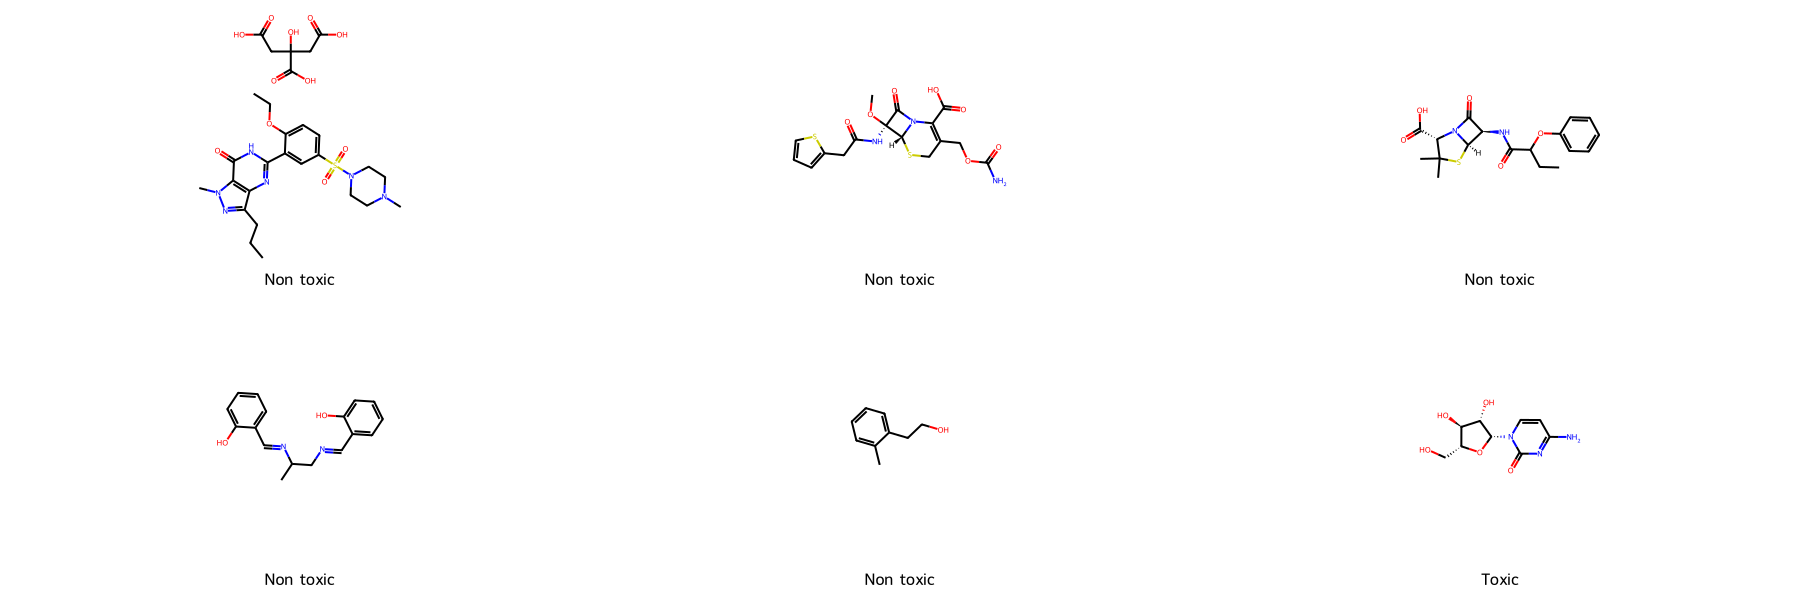

In [10]:
from rdkit import Chem  # RDKit 라이브러리에서 Chem 모듈 가져오기
from rdkit.Chem import Draw  # RDKit 라이브러리에서 Draw 모듈 가져오기

# 데이터셋에서 일부 분자를 시각화하기
n = 6  # 시각화할 분자의 개수
df_sample = df_tox.sample(n)  # 데이터셋에서 랜덤으로 n개의 샘플 선택

# SMILES 문자열과 독성 정보를 가져오기
smiles = df_sample.smiles.values  # SMILES 문자열 배열
legend = df_sample.toxic.values  # 독성 정보 배열
molecs = [Chem.MolFromSmiles(s) for s in smiles]  # SMILES 문자열을 분자 객체로 변환

# 분자 이미지 그리드 생성
Draw.MolsToGridImage(
    molecs,  # 시각화할 분자 객체 목록
    subImgSize=(600, 300),  # 개별 이미지 크기 설정
    legends=["Toxic" if i == 1 else "Non toxic" for i in legend]  # 독성 정보에 따라 레전드 추가
)


In [8]:
# 데이터셋에서 독성 분자의 수 계산
counts = df_tox["toxic"].value_counts()  # 독성 정보에 따른 카운트

# 총 분자 수와 독성 분자 수 출력
print(f"The dataset contains {counts.sum()} molecules; {counts.iloc[1]} of them are toxic.")


The dataset contains 7950 molecules; 1764 of them are toxic.


## 이제, [mordred 패키지](http://mordred-descriptor.github.io/documentation/master/descriptors.html)를 사용하여 몇 가지 분자 특성을 계산해 보겠습니다.

In [9]:
from rdkit import Chem  # RDKit 라이브러리에서 Chem 모듈 가져오기
import numpy as np  # NumPy 라이브러리 가져오기
from deepchem.feat import MordredDescriptors  # DeepChem의 MordredDescriptors 가져오기

# 3D 정보를 무시하고 MordredDescriptors 객체 생성
featurizer = MordredDescriptors(ignore_3D=True)

# SMILES 문자열("CCC")에 대한 분자 특성(Descriptors) 계산
features = featurizer.featurize("CCC")

# 생성된 분자 특성의 수 출력
print("Number of molecular descriptors:", features.shape[1])


wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


Number of molecular descriptors: 1613


이 과정을 통해서 descriptor들을 계산할 수 있습니다. 40분 가량 걸리는 작업이므로, 아래 코드를 통해 사전에 계산해둔 것을 불러옵니다.

```python
from mordred import Calculator, descriptors
from rdkit import Chem
import numpy as np
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')


# Mordred의 Calculator를 사용합니다.
featurizer = Calculator(descriptors)

# 올바르지 않은 SMILES를 식별
invalid_smiles = df_tox.smiles.apply(lambda x: Chem.MolFromSmiles(x) is None)
print(f"Invalid SMILES count: {invalid_smiles.sum()}")

# 유효한 SMILES만 선택
valid_smiles = df_tox.smiles[~invalid_smiles]
y_raw = df_tox.toxic[~invalid_smiles]

# 유효한 SMILES에 대해 featurize
X_raw = valid_smiles.apply(lambda x: np.array(featurizer(Chem.MolFromSmiles(x))).reshape(1, -1))

# 형상이 올바르지 않은 분자를 추가로 필터링
valid_shape = X_raw.apply(lambda x: x.shape == (1, X_raw.iloc[0].shape[1]))
print(f"Dropping {(~valid_shape).sum()} molecules that couldn't be featurized.")

# 유효한 데이터만 남김
X = X_raw[valid_shape].values
y = y_raw[valid_shape].values

# Numpy 배열로 결합
X = np.concatenate(X)

# 계산된 특성을 저장
np.save("data/features_tox.npy", X)
np.save("data/y_tox.npy", y)
```

In [3]:
from rdkit import Chem
import numpy as np

X = np.load("data/features_tox.npy")
y = np.load("data/y_tox.npy")

## Data splitting

이번 연습에서는 간단한 훈련/테스트 분할을 진행합니다. 하이퍼파라미터 최적화를 수행하지 않을 것입니다.

In [11]:
from sklearn.model_selection import train_test_split

# 훈련 데이터 크기 : 테스트 데이터 크기 = 0.8 : 0.2
# random_state 매개변수를 사용해 고정된 시드로 동일한 데이터 분할을 유지
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=0
)

# 훈련 세트와 테스트 세트의 크기 출력
print(f"훈련 세트 크기: {X_train.shape[0]} 행, 테스트 세트 크기: {X_test.shape[0]} 행.")


훈련 세트 크기: 6345 행, 테스트 세트 크기: 1587 행.


## 모델

Scikit-learn에서 [랜덤 포레스트 분류(Random Forest Classification)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)를 훈련시켜 봅시다.


In [12]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 분류기 정의
rf_clf = RandomForestClassifier(
    n_estimators=300,  # 생성할 트리의 수
    max_depth=10,      # 각 트리의 최대 깊이
    random_state=0     # 결과를 재현할 수 있도록 시드 고정
)

# 모델 훈련
rf_clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=300, random_state=0)

### 연습 문제: 수업 중 배운 몇 가지 분류 알고리즘을 직접 구현해 보세요.

이 연습에서는 sklearn을 사용하여 본인이 선호하는 두 가지 알고리즘을 구현하는 것이 목표입니다.

추천 알고리즘:

- [Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
- [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#classification)
- [Gradient Boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting)
- 기타 [sklearn 문서](https://scikit-learn.org/stable/supervised_learning.html)에 나와 있는 알고리즘 중에서 선택

각 모델에 서로 다른 이름을 부여하세요. 예를 들어, 랜덤 포레스트 모델은 `rf_clf`로 명명했습니다.


In [13]:
##################
# Your code here #
##################

## 이 모델들을 훈련한 후, 어떤 것이 가장 잘 작동했는지 확인해 봅시다!

분류 모델의 평가에서는 회귀 모델과는 다른 **평가지표**를 사용합니다. \
각 지표에 대한 더 자세한 설명은 [여기](https://scikit-learn.org/stable/modules/model_evaluation.html)에서 읽어볼 수 있습니다. \
이번 수업에서는 [정확도(Accuracy)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score), [ROC-AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score), [F1 Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) 등을 사용합니다.


In [14]:
# 모델을 평가해봅시다!
y_pred_rf = rf_clf.predict(X_test)

# 연급문제: 추가로 훈련시킨 모델들로 test set에 있는 분자들의 독성을 예측해보세요.

##################
# Your code here #
##################

In [15]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    f1_score
)

# 랜덤 포레스트 모델의 accuracy_score 계산
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"랜덤 포레스트 분류기의 정확도(Accuracy)는 {acc_rf:.3f}")

# 랜덤 포레스트 모델의 roc_auc_score 계산
auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"랜덤 포레스트 분류기의 ROC-AUC는 {auc_rf:.3f}")

# 랜덤 포레스트 모델의 f1_score 계산
f1s_rf = f1_score(y_test, y_pred_rf)
print(f"랜덤 포레스트 분류기의 F1 점수는 {f1s_rf:.3f}")

# 연습: 학습한 모든 모델에 대해 위의 3가지 평가지표를 계산하고 결과를 비교해 보세요.

##################
# Your code here #
##################


랜덤 포레스트 분류기의 정확도(Accuracy)는 0.835
랜덤 포레스트 분류기의 ROC-AUC는 0.691
랜덤 포레스트 분류기의 F1 점수는 0.542


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Classes', ylabel='Actual Classes'>

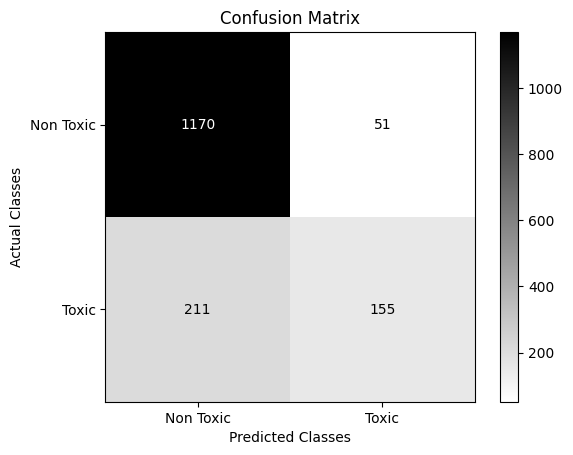

In [16]:
from pycm import ConfusionMatrix

# confusion matrix 계산 및 생성
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred_rf)

# 레이블을 읽기 쉽게 변경
cm.relabel(mapping={0: "Non Toxic", 1: "Toxic"})

# confusion matrix 시각화
cm.plot(number_label=True)


# 그렇다면, 내 분자는 독성이 있을까? 모델이 무엇이라고 말하는지 확인해 봅시다!

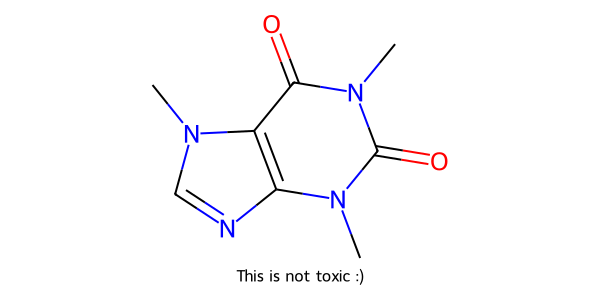

In [17]:
from IPython.display import display

def is_this_toxic(molecule, model):
    """
    모델에게 입력된 분자(SMILES)가 독성인지 여부를 묻습니다.
    """

    # SMILES로부터 분자 객체 생성
    mol = Chem.MolFromSmiles(molecule)

    # 분자의 피처 계산
    X_my_mol = featurizer.featurize(molecule)

    # 모델의 예측 수행
    is_toxic = model.predict(X_my_mol)
    is_toxic = "This molecule is toxic!" if is_toxic else "This is not toxic :)"

    # 결과를 시각화하여 출력
    img = Draw.MolsToGridImage(
        [mol],
        subImgSize=(600,300),
        legends=[is_toxic],
        molsPerRow=1
    )
    display(img)

# 독성 여부를 확인할 분자 정의
molecule = "O=C1N(C)C(C2=C(N=CN2C)N1C)=O"
is_this_toxic(molecule, model=rf_clf)

# 연습 문제: 직접 선택한 분자로 테스트해 보세요!


---

## 신뢰할 수 있을까?: 모델 해석과 설명 가능성.

> 멋지네요! 하지만 모델이 뭘 알고 있다는 사실뿐만 아니라, 우리도 알고 싶습니다. \
> 모델이 독성을 예측할 때 어떤 것을 보고 있을까요? 특정한 핵심 특징이 있을까요?

\
모델 설명 가능성(Explainability)은 머신러닝의 중요한 구성 요소로, 모델이 예측이나 결정을 내리는 방법에 대한 통찰력을 제공합니다. 말하자면, 머신러닝 모델의 "블랙박스"를 더 투명하게 만들어, 모델 출력에 영향을 미치는 요인들을 이해할 수 있도록 돕습니다.

모델 설명 가능성을 구현하기 위한 다양한 방법들이 있습니다(자세한 내용은 [여기](https://www.kaggle.com/learn/machine-learning-explainability)에서 확인 가능). \
이런 기법들은 모델의 출력을 이끄는 주요 특징이나 변수를 식별하고, 모델의 의사 결정 과정을 이해하는 데 도움을 줄 수 있습니다.

### 이번에는 특징 중요도를 측정하여, 모델이 예측을 할 때 어떤 부분에 주목하고 있는지 알아보겠습니다.


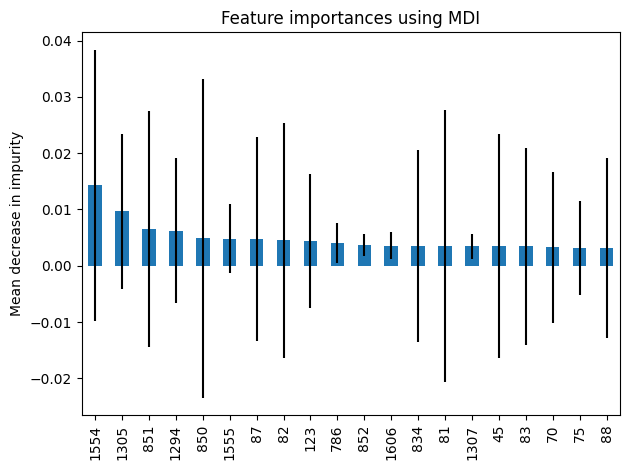

In [18]:
# 특징 중요도를 계산하여 상위 20개의 특징을 추출하고 시각화합니다.
importances = pd.Series(rf_clf.feature_importances_, name="importance")
importances.index += 1  # 특징 인덱스를 1부터 시작하도록 조정
std = pd.Series(np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0),
                name="std")  # 각 특징의 표준편차 계산

# 중요도와 표준편차를 결합한 후, 중요도 순으로 정렬
importances = pd.concat([importances, std], axis=1)
importances = importances.sort_values(by="importance", ascending=False).iloc[:20]

# 중요도 막대 그래프 생성
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
importances["importance"].plot.bar(yerr=importances["std"], ax=ax)  # 막대 그래프에 표준편차 추가
ax.set_title("Feature importances using MDI")  # 그래프 제목 설정
ax.set_ylabel("Mean decrease in impurity")  # y축 레이블 설정
fig.tight_layout()  # 그래프 레이아웃 조정


---
이 결과로부터 무엇을 배울 수 있을까요? \
[Mordred 문서](http://mordred-descriptor.github.io/documentation/master/descriptors.html)를 확인하여 이러한 특징들을 찾아보세요. 이들이 무엇을 나타내는지, 그리고 이치에 맞는지 생각해 보세요.

예를 들어 1305 번 descriptor는 number of hydrogen bond acceptor를 의미합니다.

---
